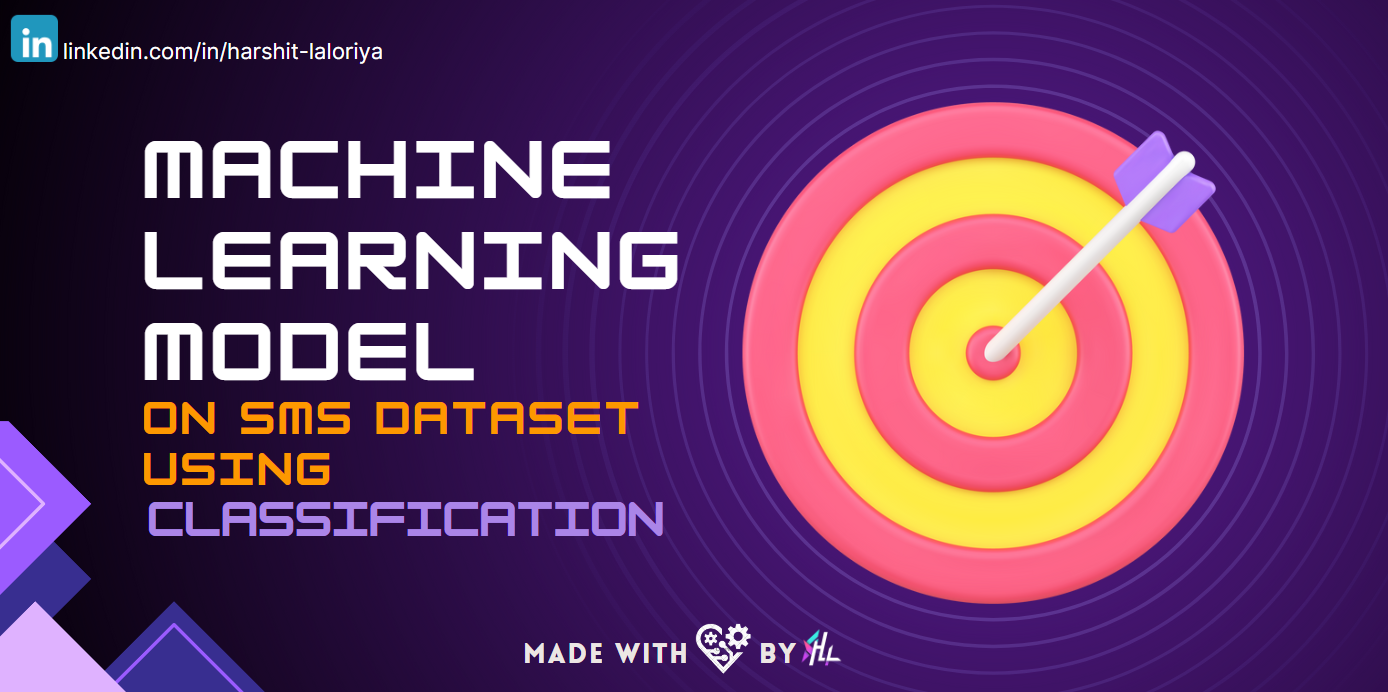

# Context of the project i worked on ?
SMS ham or spam detection involves identifying whether an incoming message is legitimate (ham) or unsolicited and potentially harmful (spam). One effective method for this task is using a Naive Bayes classification algorithm. Naive Bayes, a probabilistic classifier, assumes independence among features and is particularly well-suited for text classification. In the context of SMS detection, the model is trained on a dataset containing labeled examples of ham and spam messages. Features such as word frequencies, the presence of specific keywords, and message length are extracted from the text. During training, the model calculates the probability of each word appearing in spam and ham messages. When a new SMS arrives, the model uses these probabilities to predict its category. Naive Bayes is favored for its simplicity, efficiency, and effectiveness in handling large text datasets, making it an ideal choice for real-time SMS spam detection systems.

# Dataset description
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
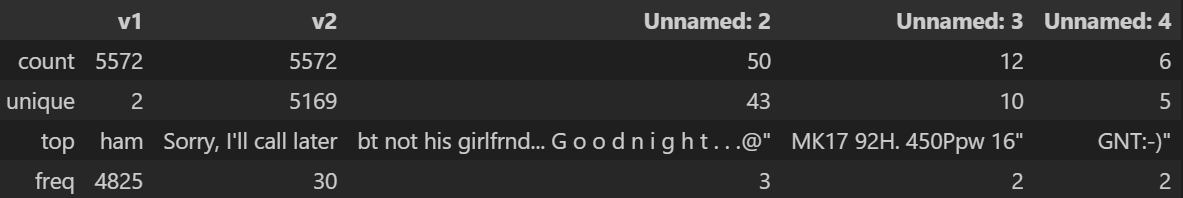

FOR MORE DETAILS ABOUT DATASET VISIT : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# Here is a step-by-step breakdown of how I operate on this project.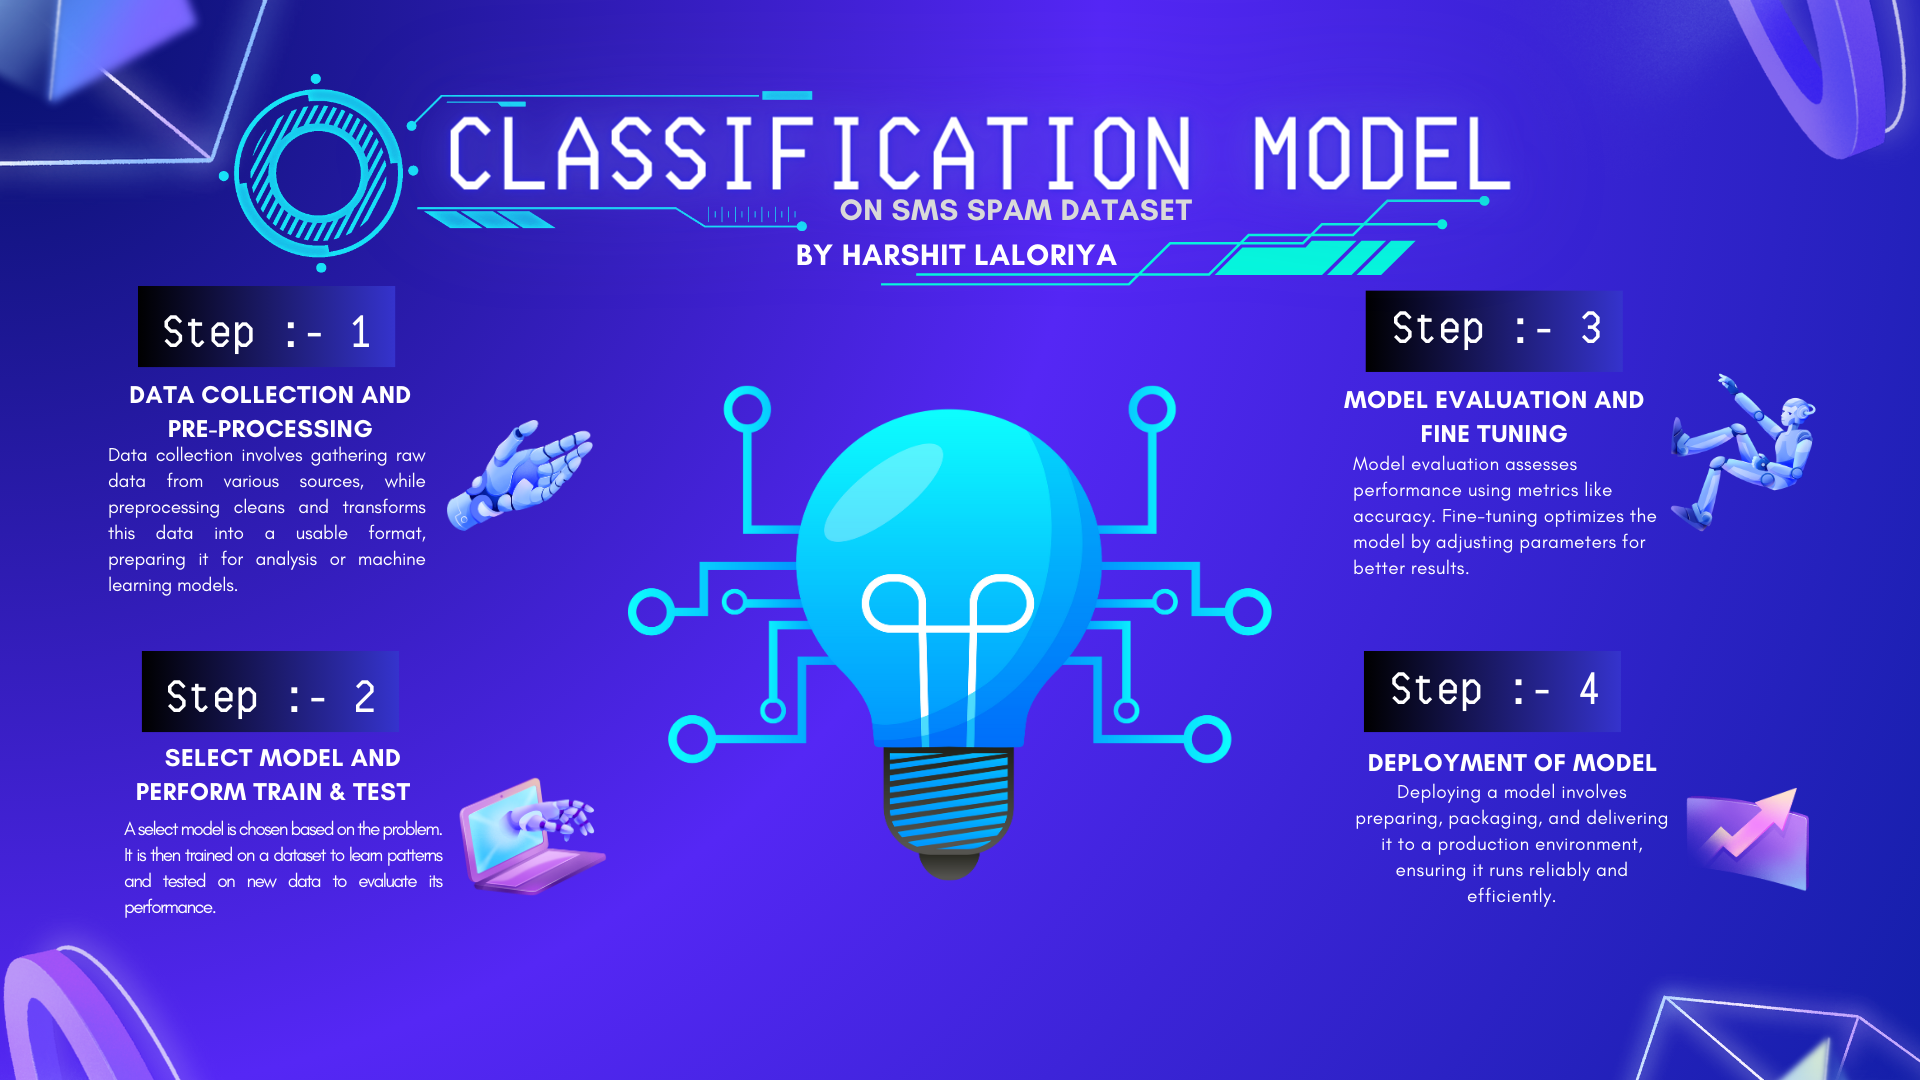

In [1]:
# importing the libraries needed to execute fundamental dataset operations
import numpy as np
import pandas as pd

In [2]:
# reading dataset with encoding="ISO-8859-1"
df_sms = pd.read_csv(filepath_or_buffer=".\\dataset\\spam.csv", encoding="ISO-8859-1")

In [3]:
# understanding the data present inside dataset
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# shape of the dataset
df_sms.shape

(5572, 5)

In [5]:
# looking for more details using .info()
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# more details
df_sms.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df_sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
# removing unnecessary columns(Dimensionality reduction)
df_sms.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
# checking columns are removed or not
df_sms.sample(5)

,v1,v2
2198,ham,I'm in a movie. Call me 4 wat?
2813,ham,"Alright if you're sure, let me know when you'r..."
1925,ham,We don call like &lt;#&gt; times oh. No give...
4854,ham,Same to u...
209,ham,Both :) i shoot big loads so get ready!


In [10]:
# unique values of first column
df_sms['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
# renaming columns
df_sms = df_sms.rename(columns={"v1":"type", "v2":"sms"})

In [12]:
# checking
df_sms.sample()

,type,sms
4769,ham,CHEERS LOU! YEAH WAS A GOODNITE SHAME U NEVA C...


In [13]:
# looking for duplicate data
df_sms.duplicated().sum()

403

In [14]:
# removing duplicate data from dataframe
df_sms.drop_duplicates(inplace=True)

In [15]:
# checking ..
df_sms.duplicated().sum()

0

In [16]:
# importing libraries for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# counting value of number of ham "sms" or "spam" sms
spam_or_not = df_sms['type'].value_counts()
spam_or_not

type
ham     4516
spam     653
Name: count, dtype: int64

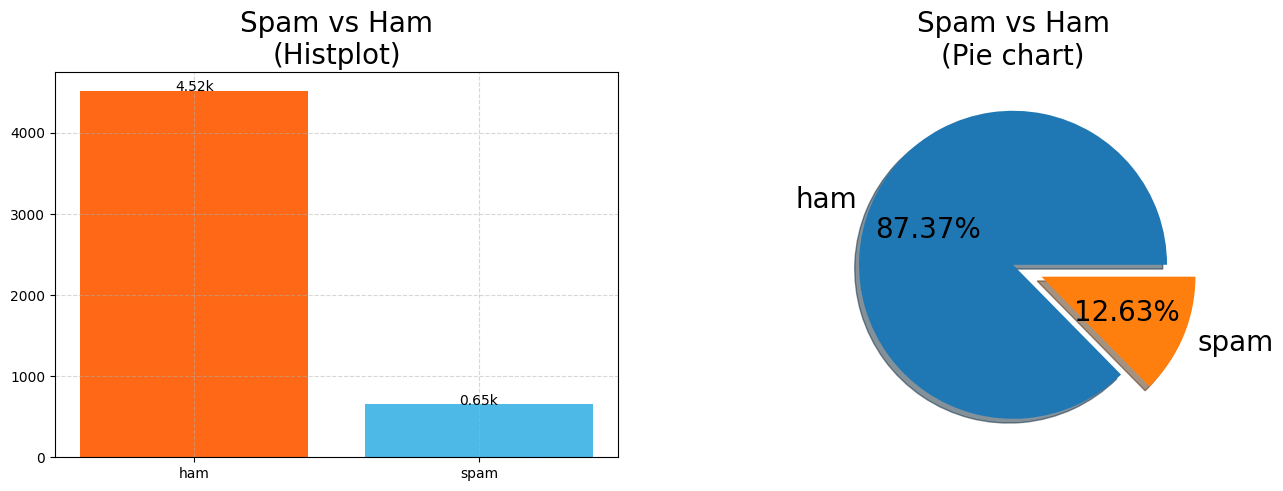

In [18]:
# visulizing data
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.bar(spam_or_not.index, spam_or_not.values, color = ["#FE6816","#4CB9E7"])
for i, value in enumerate(spam_or_not.values):
    plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
plt.grid( True, linestyle='--', alpha=0.5, zorder=0)
plt.title(label="Spam vs Ham\n(Histplot)", fontdict={"size" : "20"})

plt.subplot(1,2,2)
plt.pie(x=spam_or_not,explode=[0,0.2], shadow=True, labels=spam_or_not.index,textprops={'fontsize':20},autopct = "%.2f%%")
plt.title(label="Spam vs Ham\n(Pie chart)", fontdict={"size" : "20"})
plt.show()

In [19]:
# importing Natural Language Toolkit (NLTK)
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_dat

True

In [20]:
# creating three more columns
# 1. number of characters
# 2. number of words.
# 3. number of sentences.

In [21]:
df_sms['number_of_chars'] = df_sms['sms'].apply(lambda x: len(x))

In [22]:
df_sms['number_of_words'] = df_sms['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df_sms['number_of_sentences'] = df_sms['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
# checking
df_sms.sample()

,type,sms,number_of_chars,number_of_words,number_of_sentences
1301,ham,I tot u reach liao. He said t-shirt.,36,10,2


In [25]:
# using pandas groupby() so i can perfrom more accurate operation on data
spam_v_ham = df_sms.groupby(by='type')
ham = spam_v_ham.get_group(name='ham')
spam = spam_v_ham.get_group(name='spam')

In [26]:
# describing ham details
ham.describe()

,number_of_chars,number_of_words,number_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# describing spam details
spam.describe()

,number_of_chars,number_of_words,number_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
# mean
x = pd.concat([ ham.describe().loc['mean'], spam.describe().loc['mean']], axis=1)
x.columns = ['ham', 'spam']
x = x.T
x

,number_of_chars,number_of_words,number_of_sentences
ham,70.459256,17.123782,1.820195
spam,137.891271,27.667688,2.970904


In [29]:
# count
y = pd.concat([ ham.describe().loc['min'], spam.describe().loc['min']], axis=1)
y.columns = ['ham', 'spam']
y.astype({'ham' : 'int64', 'spam': 'int64'}).T

,number_of_chars,number_of_words,number_of_sentences
ham,2,1,1
spam,13,2,1


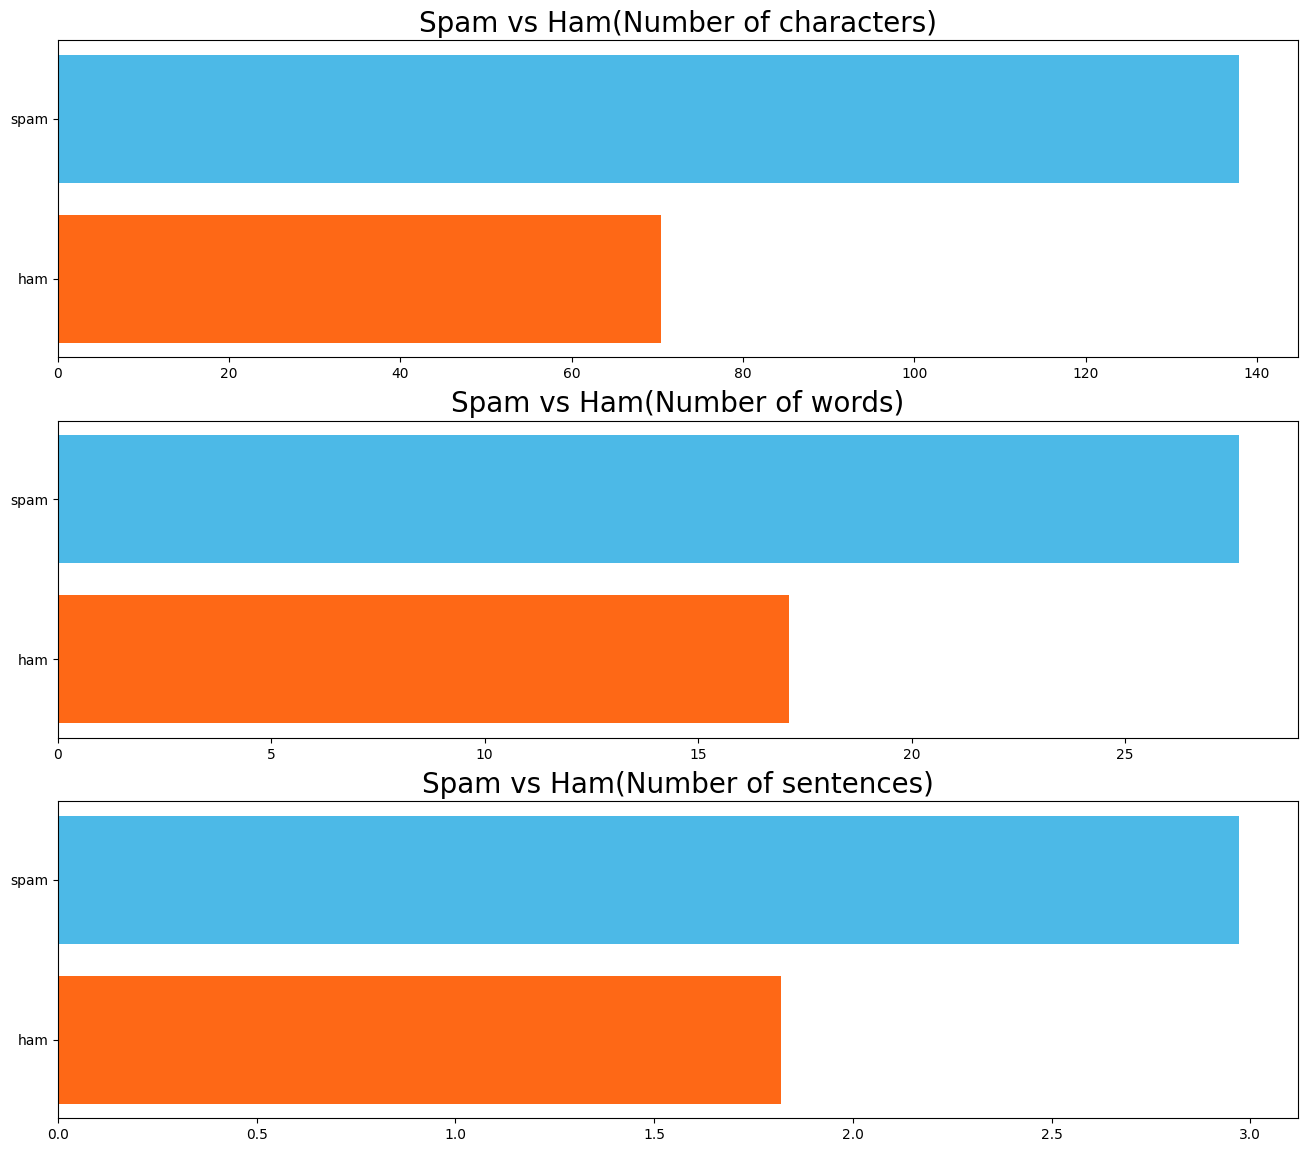

In [30]:
# visulizing using horizontal bar plot
plt.figure(figsize=[16,14])
plt.subplot(3,1,1)
plt.barh(y=x.index, width=x['number_of_chars'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of characters)", fontdict={"size" : "20"})
plt.subplot(3,1,2)
plt.barh(y=x.index, width=x['number_of_words'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of words)", fontdict={"size" : "20"})
plt.subplot(3,1,3)
plt.barh(y=x.index, width=x['number_of_sentences'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of sentences)", fontdict={"size" : "20"})
plt.show()

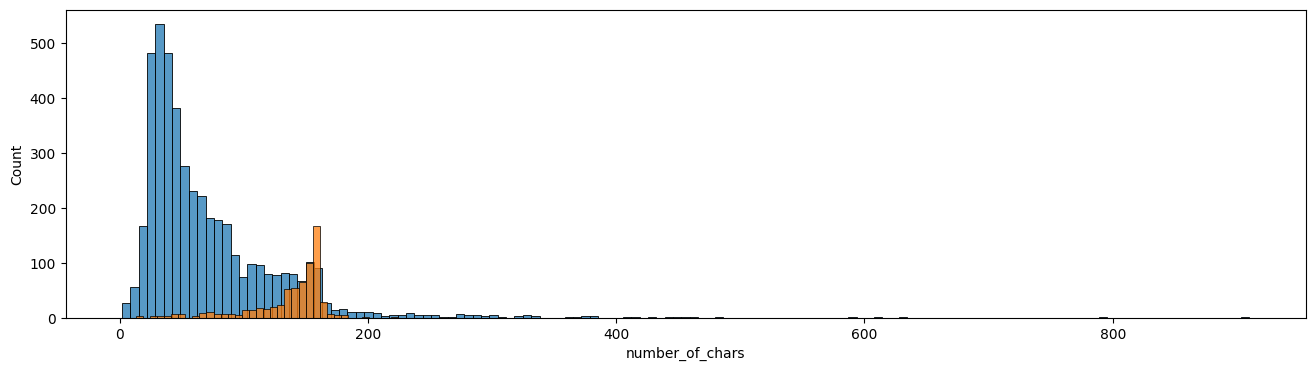

In [31]:
# visulizing using histplot (spam vs ham -->(number of characters))
plt.figure(figsize=[16,4])
sns.histplot(df_sms[df_sms['type']=='ham']['number_of_chars'])
sns.histplot(df_sms[df_sms['type']=='spam']['number_of_chars'])
plt.show()

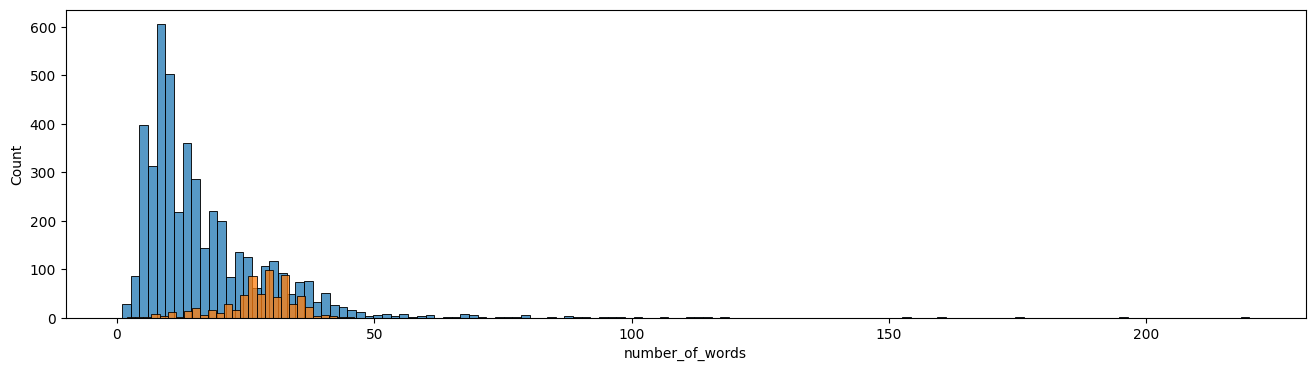

In [32]:
# visulizing using histplot (spam vs ham -->(number of words))
plt.figure(figsize=[16,4])
sns.histplot(df_sms[df_sms['type']=='ham']['number_of_words'])
sns.histplot(df_sms[df_sms['type']=='spam']['number_of_words'])
plt.show()

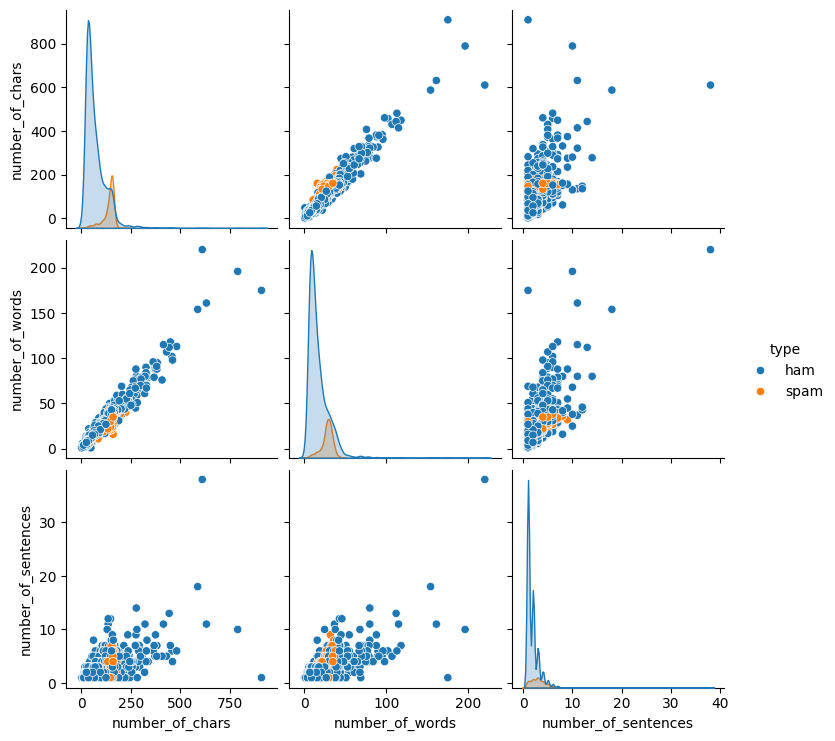

In [33]:
# visulizing variable relationship details using pairplot()
sns.pairplot(data=df_sms, hue='type')
plt.show()

In [34]:
# importing ENCODER to encode "type" column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_sms['type'] = encoder.fit_transform(df_sms['type'])

In [35]:
# checking ..
df_sms

,type,sms,number_of_chars,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [36]:
# seperating column names which stores only continous values
# for correlation matrix operation's
continuous_data = df_sms.select_dtypes(include=['int']).columns
continuous_data

Index(['type', 'number_of_chars', 'number_of_words', 'number_of_sentences'], dtype='object')

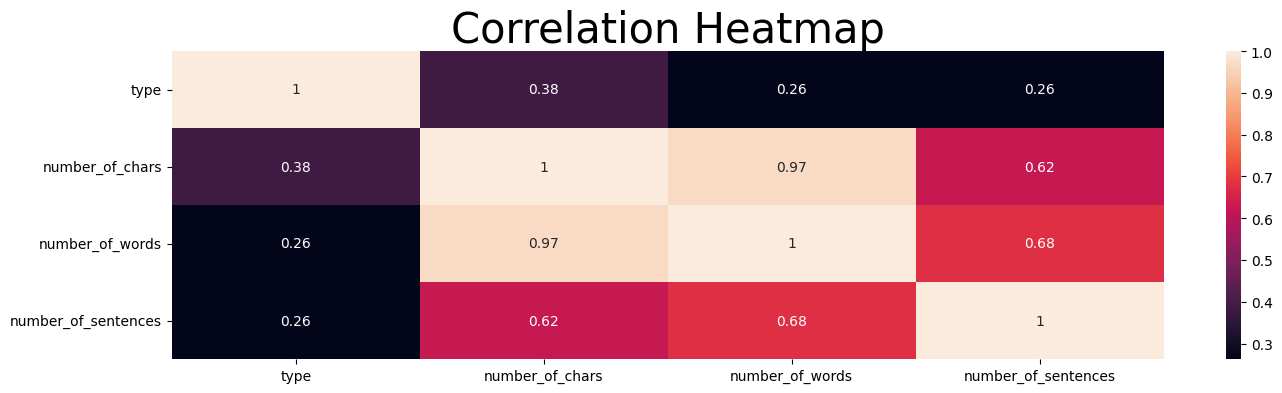

In [37]:
# correlation matrix
corr_matrix = df_sms[continuous_data].corr()

# Creating a heatmap using seaborn
plt.figure(figsize=[16,4])
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize' : 30})
plt.show()

In [38]:
# importing stopwords to use it to remove stopwords from data
from nltk.corpus import stopwords
# importing PorterStreamer to stem the words
from nltk.stem.porter import PorterStemmer
# initializing object of PorterStemmer
ps = PorterStemmer()

In [39]:
# important function
# This function helps in preparing data to feed ML model with processed data.
def text_preprocess(text:str):
    # converts data to lowercase
    lower_case = text.lower()
    lower_case_list = nltk.word_tokenize(lower_case)

    # storing the processed words
    words = []
    # removing punctuation and stop words
    for i in lower_case_list:
        if i.isalnum() and i not in stopwords.words('english')  :
            words.append(i)

    # storing stemed words
    stemed_words = []
    # performing stemming
    for j in words:
        stemed_words.append(ps.stem(j))

    return " ".join(stemed_words)


In [40]:
# testing
text_preprocess('hello i act acted acting actor 20% better ~`!@#$%^&*()_+=-{[\\|;:<>,./?\"\']}')

'hello act act act actor 20 better'

In [41]:
# applying function on the text
df_sms['transformed_text'] = df_sms['sms'].apply(text_preprocess)

In [42]:
# importing wordcloud to visualize most common words
from wordcloud import WordCloud

In [43]:
# wordcloud object
wc = WordCloud(width= 600, height= 600, min_font_size=10, background_color='white')

In [44]:
# HAM message wordcloud
ham_cloud = wc.generate(df_sms[df_sms['type'] == 0]['transformed_text'].str.cat(sep = " "))

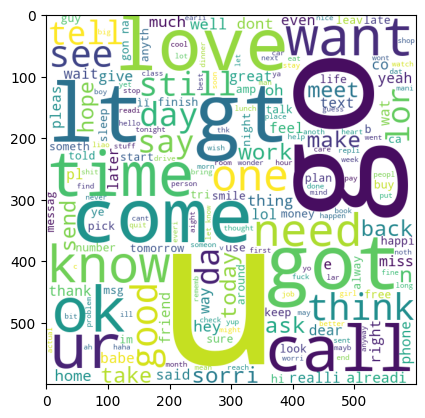

In [45]:
# visualizing Ham message wordcloud
plt.imshow(ham_cloud)
plt.show()

In [46]:
# SPAM message wordcloud
spam_cloud = wc.generate(df_sms[df_sms['type'] == 1]['transformed_text'].str.cat(sep = " "))

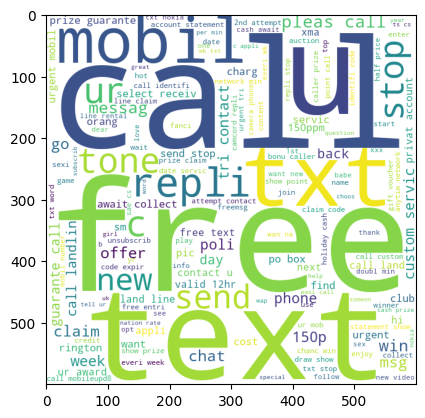

In [47]:
# Visualizing Spam message wordcloud
plt.imshow(spam_cloud)
plt.show()

In [48]:
# importing collection, so i can perform some actions on text much easily
from collections import Counter

In [49]:
# This function will return the corpus
def word_counter(x:int):
    corpus = []
    for sms in df_sms[df_sms['type'] == x]['transformed_text'].to_list():
        for word in sms.split():
            corpus.append(word)
    return corpus

In [50]:
# ham words frequency
ham_words = Counter(word_counter(0))
ham_words.most_common(10)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234)]

In [51]:
# spam words frequency
spam_words = Counter(word_counter(1))
spam_words.most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

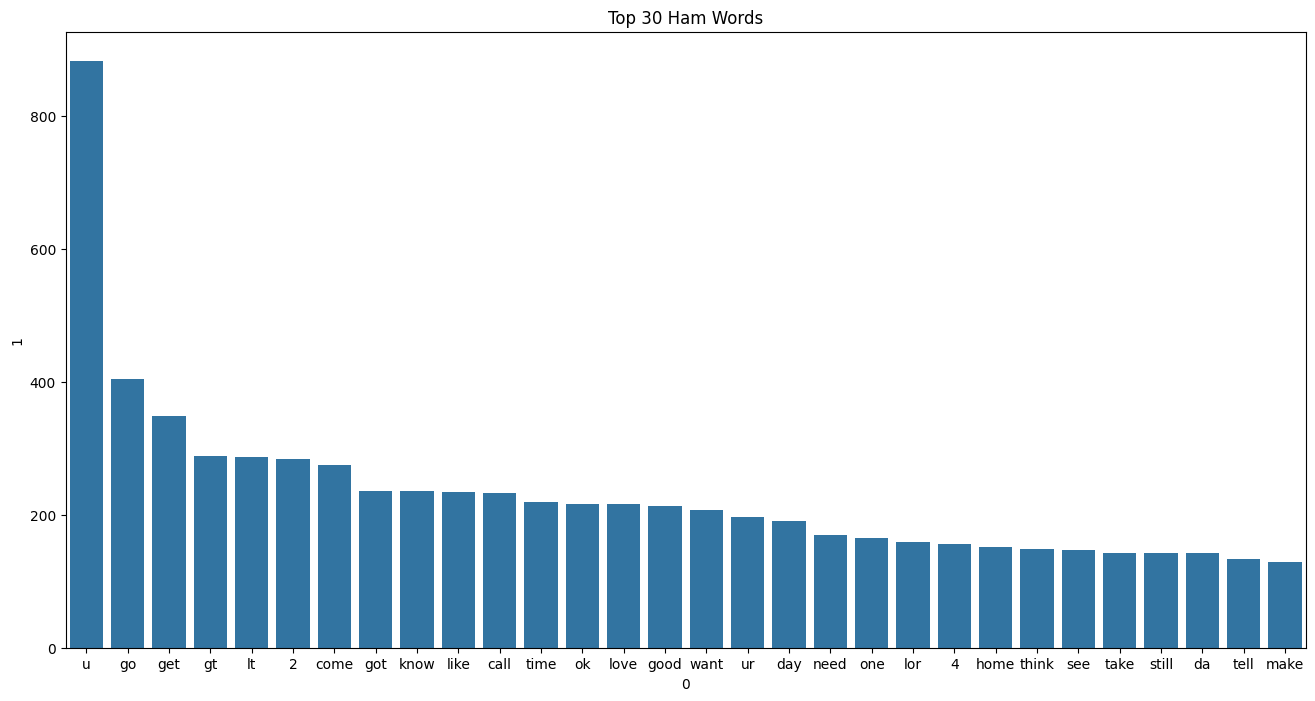

In [52]:
# VISUALIZING SPAM WORDS FREQUENCY USING barplot()
df_ham_words = pd.DataFrame(ham_words.most_common(30))
plt.figure(figsize=[16,8])
sns.barplot(data=df_ham_words, x=df_ham_words[0], y=df_ham_words[1])
plt.title("Top 30 Ham Words")
plt.show()

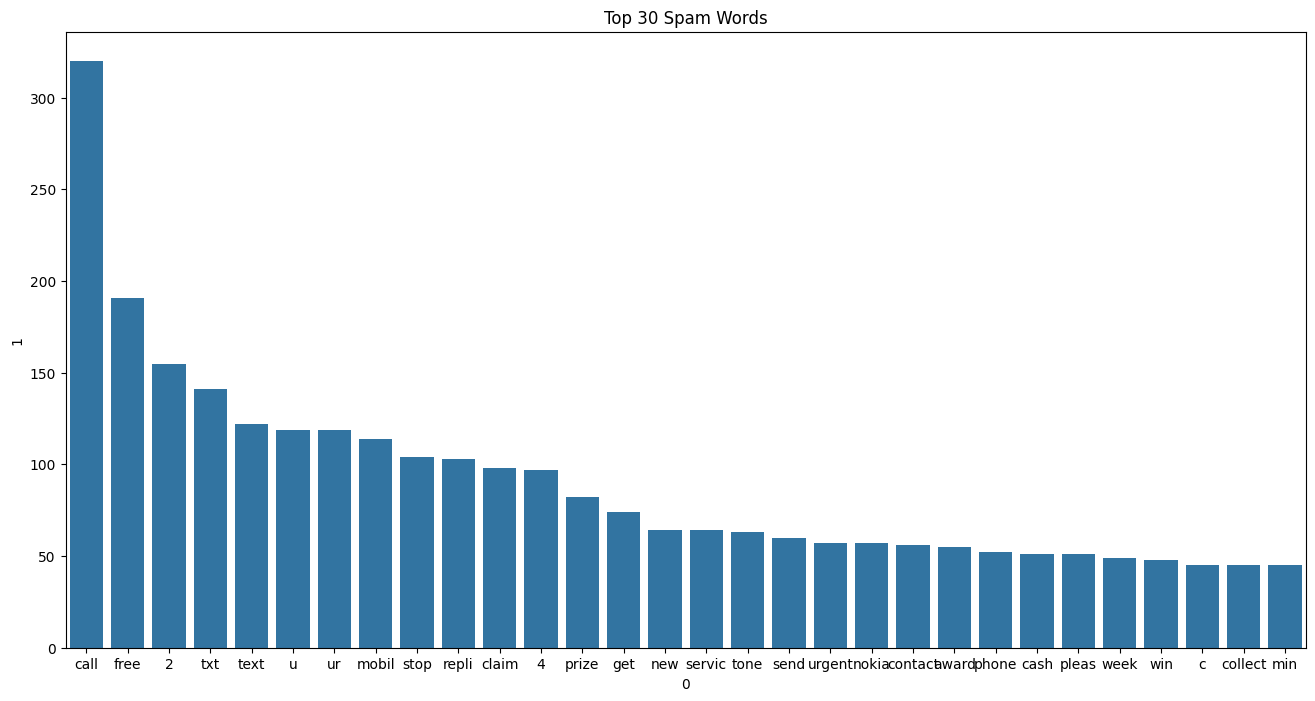

In [53]:
# VISUALIZING SPAM WORDS FREQUENCY USING barplot()
df_spam_words = pd.DataFrame(spam_words.most_common(30))
plt.figure(figsize=[16,8])
sns.barplot(x=df_spam_words[0], y=df_spam_words[1])
plt.title("Top 30 Spam Words")
plt.show()

In [54]:
# Importing TfidfVectorizer to vectorize text
from sklearn.feature_extraction.text import  TfidfVectorizer

In [55]:
# declaring tf_idf object
tf_idf = TfidfVectorizer()

In [56]:
# transforming text to vectors and storing into array
# setting x from train and test
x = tf_idf.fit_transform(df_sms['transformed_text']).toarray()
x,x.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (5169, 6708))

In [57]:
# setting y from train and test
y = df_sms['type'].values
y, y.shape

(array([0, 0, 1, ..., 0, 0, 0]), (5169,))

In [58]:
# importing train_test_split
# declaring training and testing variables
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [59]:
# importing required Algorithms
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# importing required metrices
"""These metrics help in assess the performance of  classification model,
understand its strengths and weaknesses, and make informed decisions
based on the specific context of problem"""
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
"""Choose the appropriate Naive Bayes classifier based on the nature of
your data and the problem you are trying to solve.Each variant has its
 own assumptions and is suited for specific types of features."""
# what is gnb, bnb and mnb ?
# GaussianNB stands for Gaussian Naive Bayes
# Initializing Gaussian Naive Bayes
gnb = GaussianNB()
# BernoulliNB stands for Bernoulli Naive Bayes
# Initializing Bernoulli Naive Bayes
bnb = BernoulliNB()
# MultinomialNB stands for Multinomial Naive Bayes.
# Initializing Multinomial Naive Bayes
mnb = MultinomialNB()

In [61]:
# fitting training set and training model
gnb.fit(x_train, y_train),bnb.fit(x_train, y_train),mnb.fit(x_train, y_train)

(GaussianNB(), BernoulliNB(), MultinomialNB())

In [62]:
# prediction on test set
gnb_predict = gnb.predict(x_test)
# scores and matrix based on prediction
accuracy_score(y_test, gnb_predict), confusion_matrix(y_test, gnb_predict), precision_score(y_test, gnb_predict)

(0.8704061895551257,
 array([[793, 115],
        [ 19, 107]], dtype=int64),
 0.481981981981982)

In [63]:
# prediction on test set
bnb_predict = bnb.predict(x_test)
# scores and matrix based on prediction
accuracy_score(y_test, bnb_predict), confusion_matrix(y_test, bnb_predict), precision_score(y_test, bnb_predict)

(0.9709864603481625,
 array([[906,   2],
        [ 28,  98]], dtype=int64),
 0.98)

In [64]:
# prediction on test set
mnb_predict = mnb.predict(x_test)
# scores and matrix based on prediction
accuracy_score(y_test, mnb_predict), confusion_matrix(y_test, mnb_predict), precision_score(y_test, mnb_predict)

(0.9574468085106383,
 array([[908,   0],
        [ 44,  82]], dtype=int64),
 1.0)

In [65]:
# importing pickle to import model and required objects
import pickle

In [66]:
# dumping object
pickle.dump(tf_idf, open('vectorizer.pkl','wb'))
# dumping model
pickle.dump(mnb, open('model.pkl','wb'))

In [67]:
# for checking on deployment website
df_sms['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [68]:
# for checking on deployment website
df_sms['sms'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [69]:
# dataframe
df_sms

,type,sms,number_of_chars,number_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## 👨🏽‍💻I appreciate you showed interest in my machine learning Project.

1.  Drop a ⭐ on my github.
2.  Feel free to ask me on instagram 🧢(@hellboy.hut)


The Naive Bayes classification technique is a good fit for text classification applications, thus I used it to construct an SMS spam detection model. The model determines if a message is spam or ham by examining factors like word frequencies and message length. Since it shows how machine learning can be used in real-world settings to filter out unnecessary communications and improve communication efficiency, I hope you find this project to be informative and useful.
